<IPython.core.display.Javascript object>


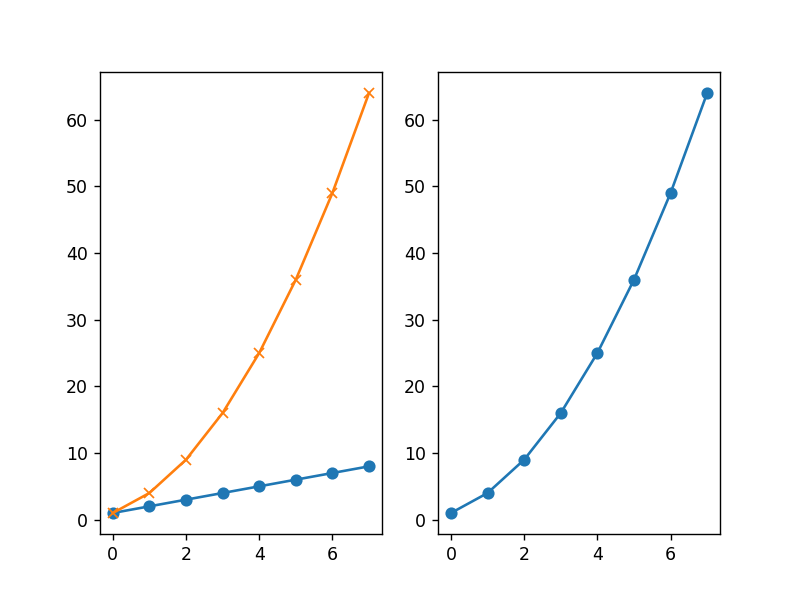

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [5]:
# SUBPLOTS
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# If wanted two subplots side by side we would add the parameters 
# 1 2 1 where 1 is the number of rows, 2 is the number of columns and
# to set the first axis as the first axis

plt.figure()
plt.subplot(1,2,1)
linearData = np.array([1,2,3,4,5,6,7,8])
expData = linearData ** 2
plt.plot(linearData, '-o')
plt.subplot(1,2,2)
plt.plot(expData, '-o')
plt.subplot(1,2,1)
plt.plot(expData, '-x')

<IPython.core.display.Javascript object>


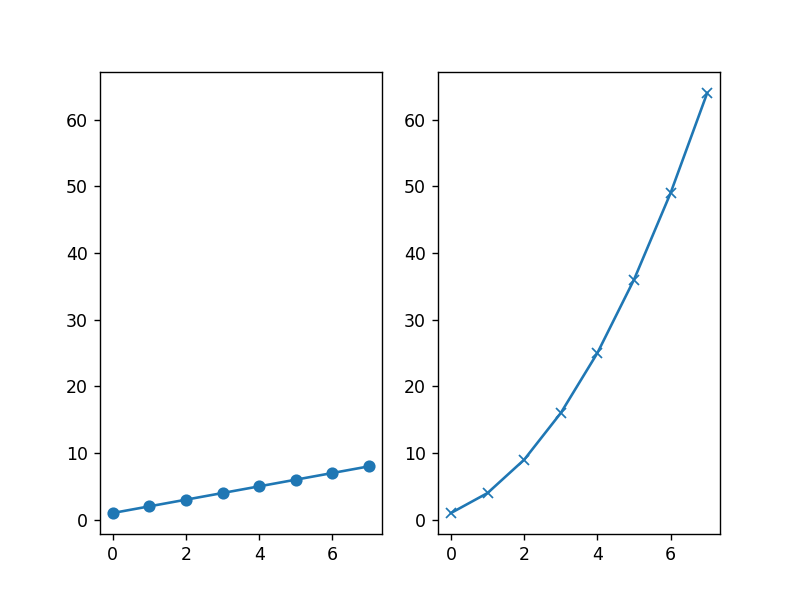

In [10]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linearData, '-o')
ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(expData, '-x')

<IPython.core.display.Javascript object>


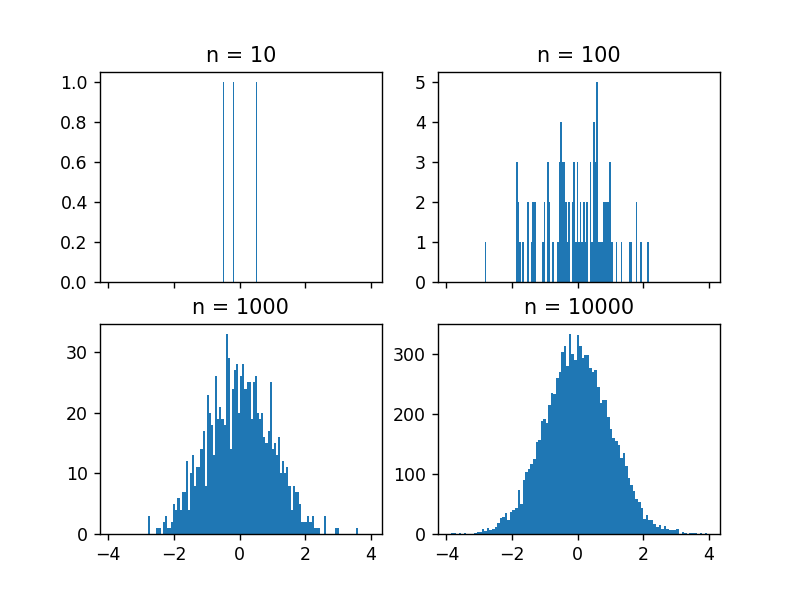

In [23]:
# Histograms

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sampleSize = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale= 1.0, size = sampleSize)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n = ' + str(sampleSize))

# np.random.normal()
# loc   : [float or array_like]Mean of 
# the distribution. 
# scale : [float or array_like]Standard 
# Derivation of the distribution. 
# size  : [int or int tuples]. 
# Output shape given as (m, n, k) then
# m*n*k samples are drawn.

# np.random.normal(0.0, 1.0, 10)

             normal        random         gamma
count  10000.000000  10000.000000  10000.000000
mean      -0.000626      0.496994      1.986023
std        0.996263      0.287222      1.407071
min       -3.706308      0.000107      0.013872
25%       -0.686004      0.250716      0.958881
50%        0.009474      0.491816      1.670390
75%        0.671792      0.742068      2.693580
max        4.064513      0.999987     11.723583


<IPython.core.display.Javascript object>


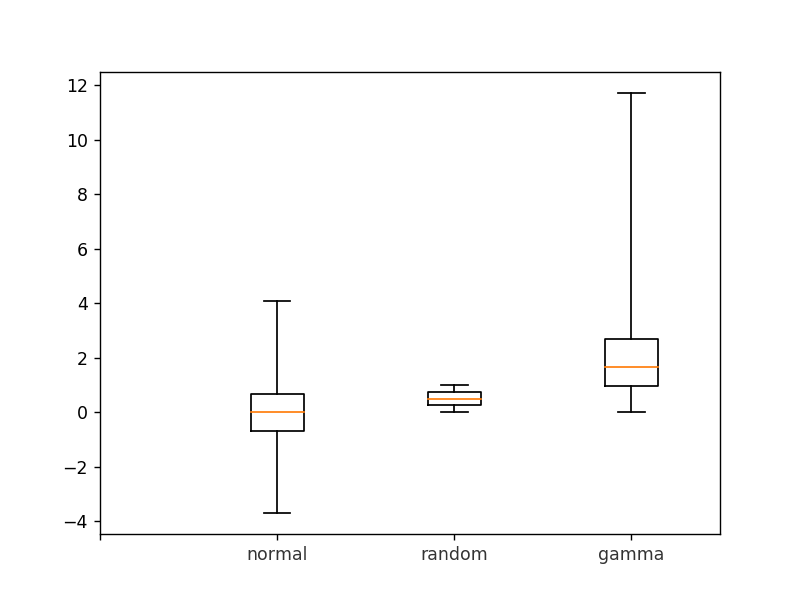

<IPython.core.display.Javascript object>


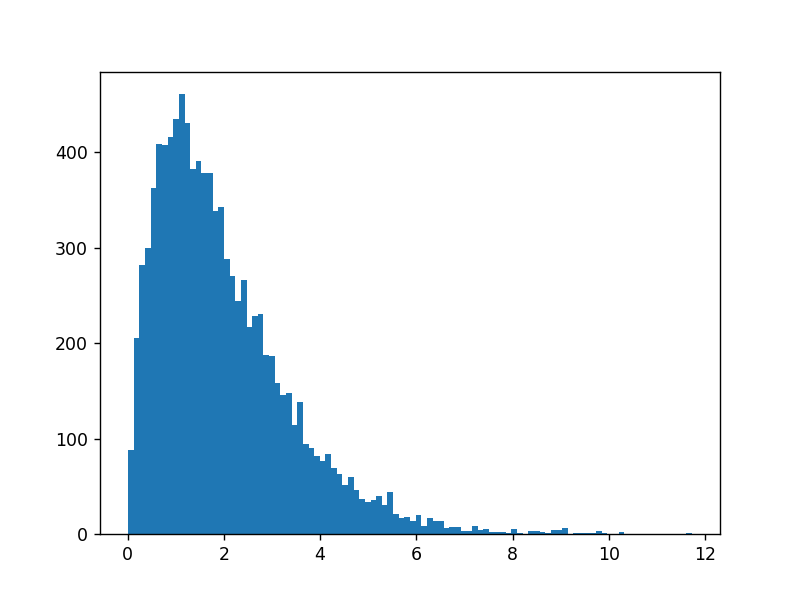

(array([ 88., 205., 282., 300., 363., 409., 408., 416., 435., 461., 431.,
        382., 391., 378., 378., 338., 343., 288., 270., 244., 266., 217.,
        228., 231., 188., 187., 158., 146., 148., 114., 138.,  94.,  90.,
         82.,  76.,  84.,  69.,  63.,  51.,  60.,  46.,  37.,  34.,  36.,
         40.,  30.,  44.,  21.,  17.,  18.,  14.,  20.,   8.,  17.,  14.,
         14.,   6.,   7.,   7.,   3.,   3.,   8.,   4.,   5.,   2.,   2.,
          2.,   1.,   5.,   1.,   0.,   3.,   3.,   2.,   1.,   4.,   4.,
          6.,   0.,   1.,   1.,   1.,   1.,   3.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.01387229,  0.13096939,  0.2480665 ,  0.3651636 ,  0.48226071,
         0.59935781,  0.71645492,  0.83355202,  0.95064913,  1.06774623,
         1.18484334,  1.30194044,  1.41903755,  1.53613465,  1.65323176,
         1.77032886,  1.88742597,  2.00452307,  2.12162018,  2.23871728,
         2.35581439,  2.47

In [34]:
import pandas as pd
normal = np.random.normal(loc=0.0, scale=1.0, size=10000)
random = np.random.random(size=10000)
gamma = np.random.gamma(2,size=10000)

df = pd.DataFrame({
    'normal': normal,
    'random': random,
    'gamma': gamma
})
print(df.describe())
plt.figure()
plt.boxplot(df['normal'], whis= 'range')
plt.clf() # Clears the figure
plt.boxplot([df['normal'],df['random'],df['gamma']], whis= 'range')
types = ['','normal', 'random', 'gamma']
pos = np.arange(len(types))
plt.xticks(pos, types, alpha=0.8)
######################################
plt.figure()
plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


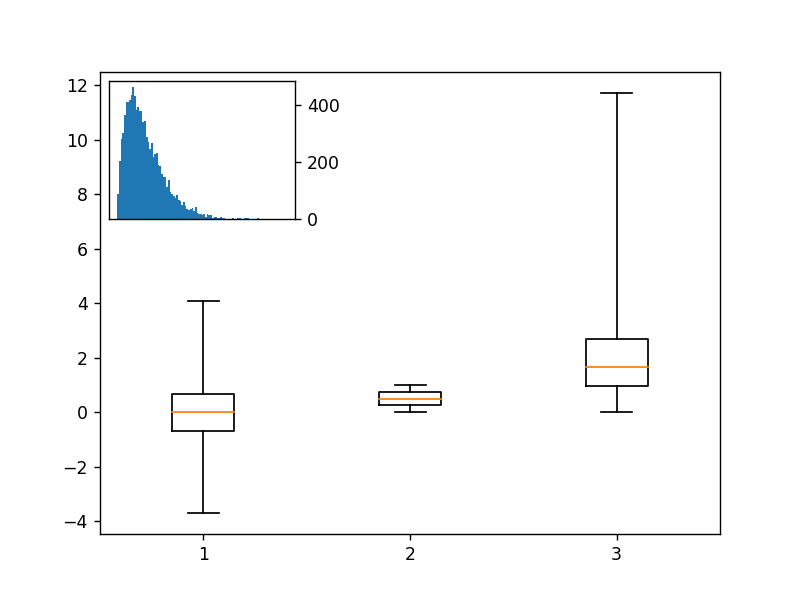

In [45]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']], whis= 'range')
ax2 = mpl_il.inset_axes(plt.gca(),width = '30%', height = '30%', loc = 2)
ax2.hist(df['gamma'],bins = 100)
ax2.tick_params(bottom='off', labelbottom = 'off')
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


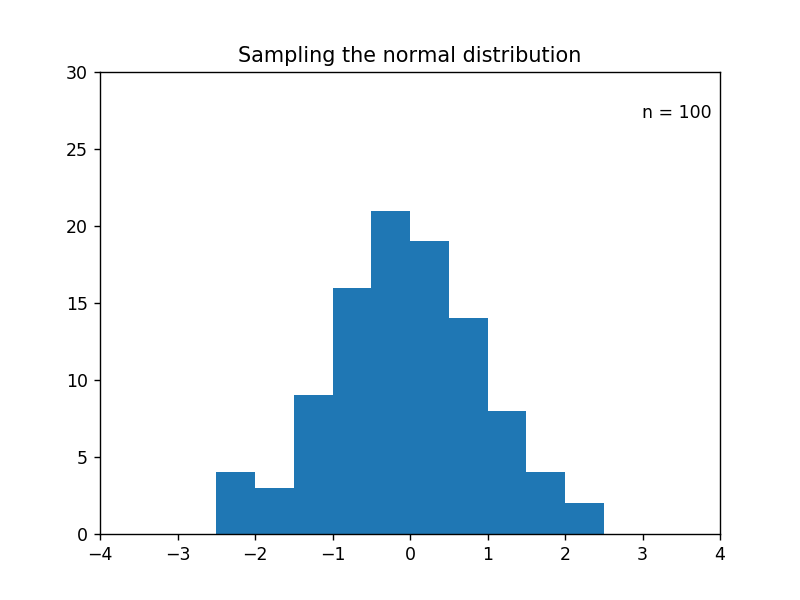

In [51]:
# Animation
import matplotlib.animation as animation
n = 100
x = np.random.randn(n)

def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla() # clear last activity
    bins = np.arange(-4,4,0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the normal distribution')
    plt.annotate('n = ' + str(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100)